In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/final.csv')

In [3]:
# Prepare features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (891, 5)
Target shape: (891,)

Feature columns:
['Pclass', 'Sex', 'Age', 'Embarked_S', 'Embarked_C']


In [4]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: 712
Testing set size: 179

Training set class distribution:
Survived
0    439
1    273
Name: count, dtype: int64

Testing set class distribution:
Survived
0    110
1     69
Name: count, dtype: int64


In [5]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples required to split
    min_samples_leaf=2,    # Minimum samples required at leaf node
    random_state=42,
    n_jobs=-1              # Use all available cores
)

rf_model.fit(X_train, y_train)

print("Random Forest Model trained successfully!")
print(f"\nNumber of trees: {rf_model.n_estimators}")
print(f"Number of features: {rf_model.n_features_in_}")
print(f"Feature names: {list(X.columns)}")

Random Forest Model trained successfully!

Number of trees: 100
Number of features: 5
Feature names: ['Pclass', 'Sex', 'Age', 'Embarked_S', 'Embarked_C']


In [6]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Get prediction probabilities
y_train_pred_proba = rf_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Predictions completed!")

Predictions completed!


In [7]:
# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 50)
print("RANDOM FOREST MODEL PERFORMANCE")
print("=" * 50)
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ROC-AUC Score
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"\nTraining ROC-AUC Score: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC Score: {test_roc_auc:.4f}")

# Check for overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"\nAccuracy difference (Train - Test): {accuracy_diff:.4f}")
if accuracy_diff > 0.05:
    print("⚠️  Warning: Model might be overfitting")
else:
    print("✓ Model generalization looks good")

RANDOM FOREST MODEL PERFORMANCE

Training Accuracy: 0.8764 (87.64%)
Testing Accuracy: 0.7877 (78.77%)

Training ROC-AUC Score: 0.9431
Testing ROC-AUC Score: 0.8352

Accuracy difference (Train - Test): 0.0887
⚠️  Warning: Model might be overfitting



CONFUSION MATRIX - Test Set
[[96 14]
 [24 45]]


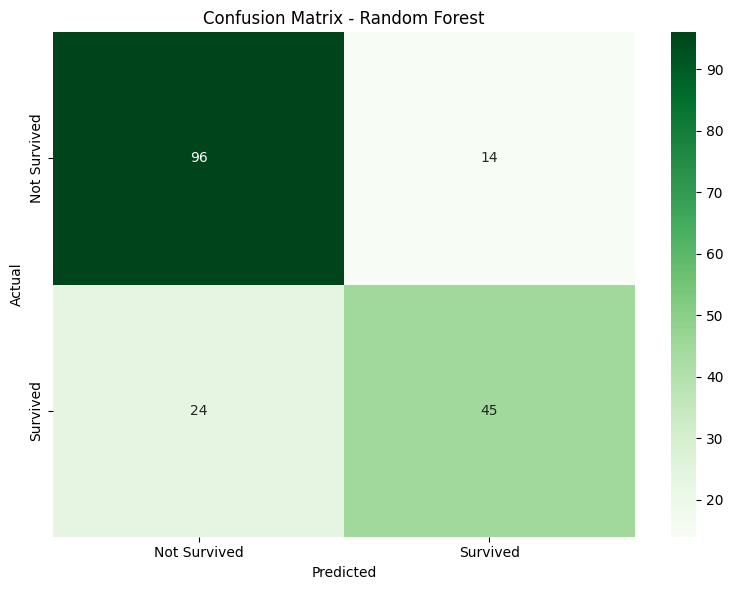

In [9]:
# Confusion Matrix
print("\n" + "=" * 50)
print("CONFUSION MATRIX - Test Set")
print("=" * 50)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [8]:
# Classification Report
print("\n" + "=" * 50)
print("CLASSIFICATION REPORT - Test Set")
print("=" * 50)
print(classification_report(y_test, y_test_pred, target_names=['Not Survived', 'Survived']))


CLASSIFICATION REPORT - Test Set
              precision    recall  f1-score   support

Not Survived       0.80      0.87      0.83       110
    Survived       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179




FEATURE IMPORTANCE (Gini Importance)
      Feature  Importance
1         Sex    0.423637
2         Age    0.352437
0      Pclass    0.174488
3  Embarked_S    0.031315
4  Embarked_C    0.018123

Total importance: 1.0000


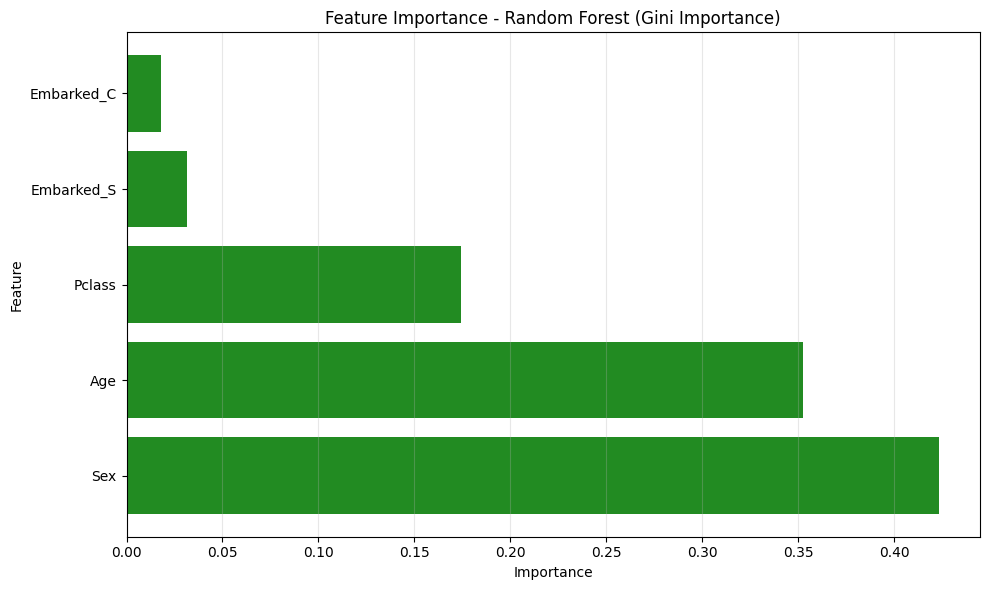

In [12]:
# Feature importance (based on Gini importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE (Gini Importance)")
print("=" * 50)
print(feature_importance)
print(f"\nTotal importance: {feature_importance['Importance'].sum():.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='forestgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest (Gini Importance)')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

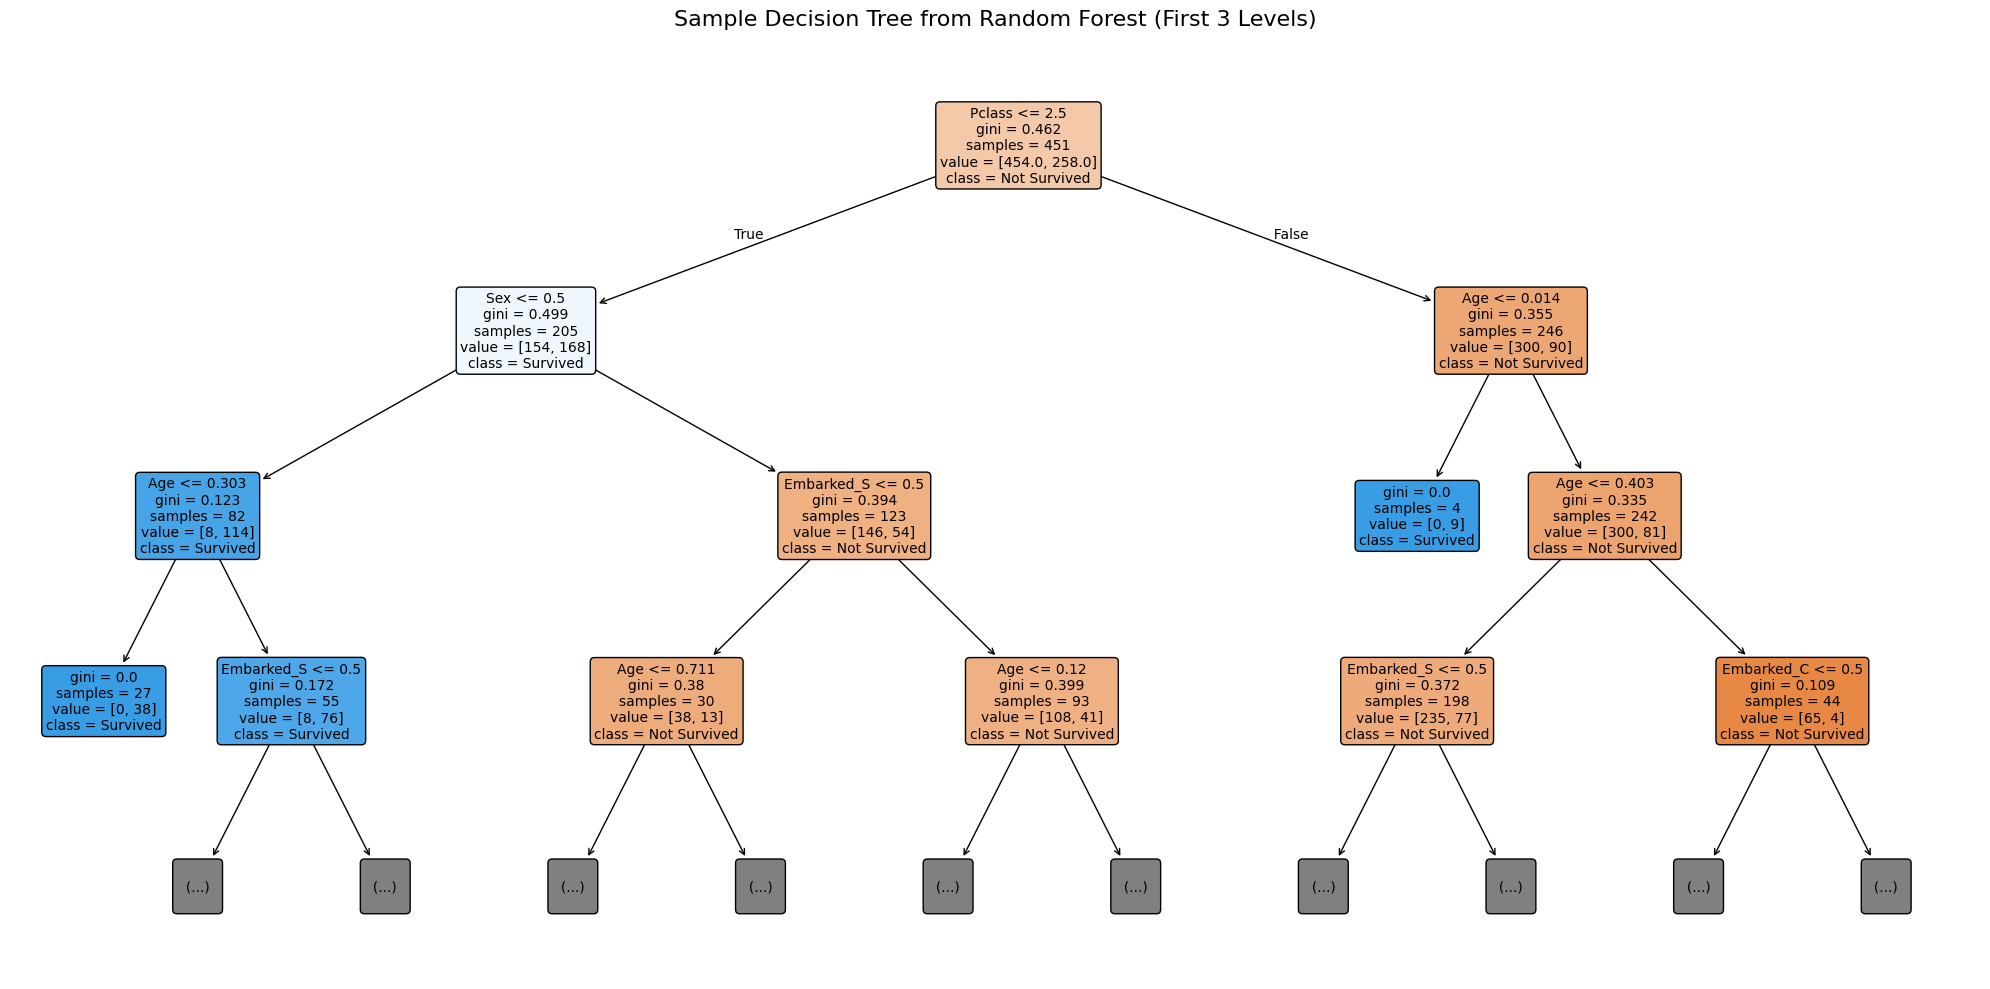


Showing first decision tree (limited to 3 levels for visualization)


In [13]:
# Visualize one of the decision trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Show only first 3 levels for readability
plt.title('Sample Decision Tree from Random Forest (First 3 Levels)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()
print("\nShowing first decision tree (limited to 3 levels for visualization)")

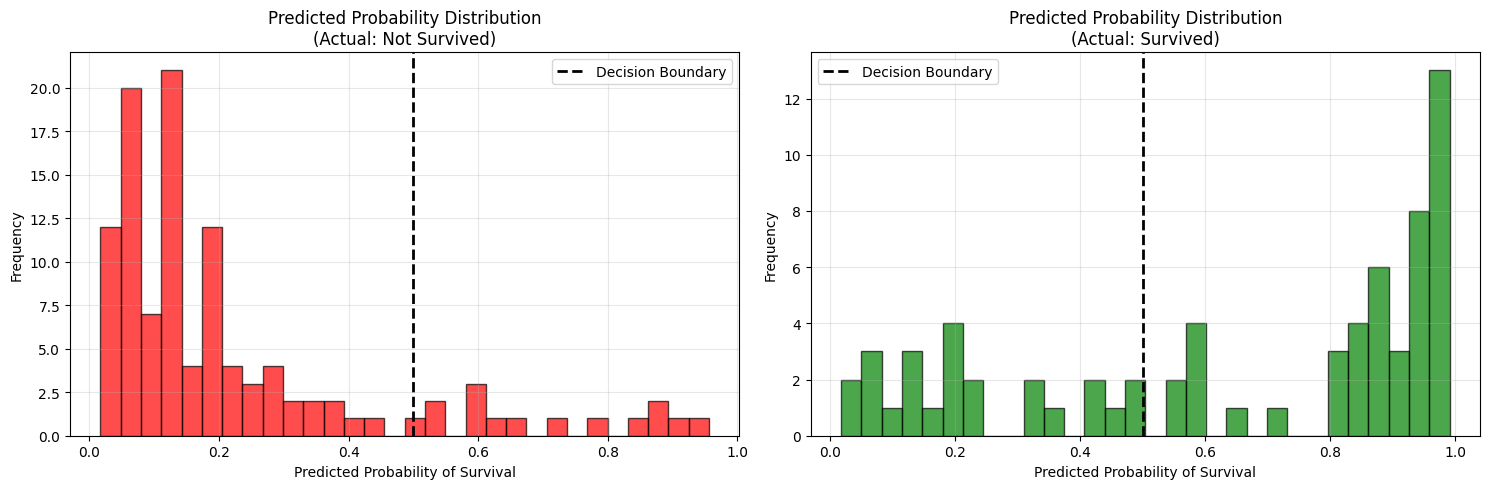

In [14]:
# Prediction probability distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for class 0 (Not Survived)
axes[0].hist(y_test_pred_proba[y_test == 0], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0].set_title('Predicted Probability Distribution\n(Actual: Not Survived)')
axes[0].set_xlabel('Predicted Probability of Survival')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot for class 1 (Survived)
axes[1].hist(y_test_pred_proba[y_test == 1], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Predicted Probability Distribution\n(Actual: Survived)')
axes[1].set_xlabel('Predicted Probability of Survival')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()